# requests 모듈

In [9]:
# requests 모듈 설치
# > pip install requests

# Anaconda 에는 기본적으로 탑재 되어 있다

# https://3.python-requests.org/

# 기본요청
#   get(url), post(url), delete(url), put(url)

# 헤더 쿠키와 함께 GET 요청
#    get(url, headers=XXX, cookies=XXX)

# 데이터와 함께 POST 요청
#    post(url, data=XXX), post(url, files=XXX)

# 인코딩 설정
#    encoding='UTF-8'

In [10]:
import requests
import urllib
from bs4 import BeautifulSoup

In [2]:
url = "https://www.naver.com"

### urllib 사용

In [4]:
html = urllib.request.urlopen(url).read().decode('utf-8')

In [6]:
dom = BeautifulSoup(html, "html.parser")

In [8]:
dom.select_one('title').text.strip()

'NAVER'

### requests 사용

In [12]:
response = requests.get(url)  # get 방식으로 url 로 request 보내기, 결과는  response 객체
response

<Response [200]>

In [ ]:
response    # out 결과는 200 이 나오면 정상적으로 처리되었슴 의미

# request 결과코드
# 200 성공

# 3xx 요청은 완료되었으나 redirect필요

# 4xx 잘못된 request
# 404 url 존재하지 않음
# 400 Bad Request : request 문법상의 오류
# 401 권한에러 : 권한 관련 적절한 header 정보가 없는 경우 많이 발생
# 402 권한에러 : 자원에 대한 접근 권한 에러
# 403  권한에러 Forbidden : 파일권한, 읽기권한, SSL, IP, 등...  <--- 웹 크롤링 하다가 은근히 자주 마주치게 되는 에러

# 5xx, 500 서버 내부 오류


In [13]:
response.status_code

200

In [16]:
# .text : response 받은 html 텍스트
response.text[:300]

'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" conte'

In [17]:
dom = BeautifulSoup(response.text, 'html.parser')


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
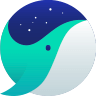
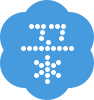

In [18]:
dom

In [19]:
"""
최초 로딩된 페이지에서 크롤링 하고자 하는 내용이 있는지 확인하려면
'페이지 소스 보기' 에서 찾아보자 

발견되면 바로 크롤링 가능
없다면? AJAX 등 동적인 로딩 가능성을 두고 다시 request  를 확인해봐야 한다.
"""
None

In [21]:
elements = dom.select('#yna_rolling .issue')

In [22]:
len(elements)  # 몇개가 select  되었는지 꼭 확인!

10

In [23]:
elements[0]

<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0012419271">신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속</a>

In [24]:
for element in elements:
    print(element.text.strip())

신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속
한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%
28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯
당정 'LH 해체안' 결론못내…與 "사전협의도 없이" 분통
특수본 "세종시 특공 수사의뢰 없어…감사원 상황 볼 것"
공수처, '윤중천 보고서 허위작성' 이규원 재소환
지구대통령 된다면?…문대통령 "해양쓰레기 줄이기 과제로"
지난해 한국식품 수출 '역대 최고'…라면 29%↑ 김치 38%↑
성주 사드기지 자재·물자 차량 반입…이달 들어 5번째
낮 동안 중부·경북·전북에 '우박'…"시설물 피해 대비해야"


In [25]:
[
    element.text.strip()
    for element in elements
]

['신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속',
 '한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%',
 "28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯",
 '당정 \'LH 해체안\' 결론못내…與 "사전협의도 없이" 분통',
 '특수본 "세종시 특공 수사의뢰 없어…감사원 상황 볼 것"',
 "공수처, '윤중천 보고서 허위작성' 이규원 재소환",
 '지구대통령 된다면?…문대통령 "해양쓰레기 줄이기 과제로"',
 "지난해 한국식품 수출 '역대 최고'…라면 29%↑ 김치 38%↑",
 '성주 사드기지 자재·물자 차량 반입…이달 들어 5번째',
 '낮 동안 중부·경북·전북에 \'우박\'…"시설물 피해 대비해야"']

## 뉴스 url 과 같이 추출

In [27]:
result = [
    {
        "뉴스" : element.text.strip(),
        "URL" : element.attrs['href'].strip()
    }
    
    for element in elements
]

result

[{'뉴스': '신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419271'},
 {'뉴스': '한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419683'},
 {'뉴스': "28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯",
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419643'},
 {'뉴스': '당정 \'LH 해체안\' 결론못내…與 "사전협의도 없이" 분통',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419581'},
 {'뉴스': '특수본 "세종시 특공 수사의뢰 없어…감사원 상황 볼 것"',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419627'},
 {'뉴스': "공수처, '윤중천 보고서 허위작성' 이규원 재소환",
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&ai

## DataFrame 에 담기

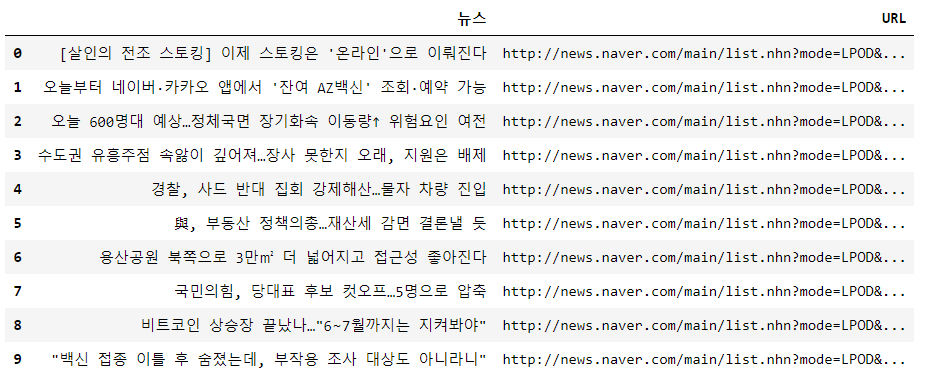

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(columns = ['뉴스', 'URL'])
df

,뉴스,URL


In [30]:
for data in result:
    df.loc[len(df)] = data
    
df

,뉴스,URL
0,"신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속",http://news.naver.com/main/list.nhn?mode=LPOD&...
1,"한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%",http://news.naver.com/main/list.nhn?mode=LPOD&...
2,28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯,http://news.naver.com/main/list.nhn?mode=LPOD&...
3,"당정 'LH 해체안' 결론못내…與 ""사전협의도 없이"" 분통",http://news.naver.com/main/list.nhn?mode=LPOD&...
4,"특수본 ""세종시 특공 수사의뢰 없어…감사원 상황 볼 것""",http://news.naver.com/main/list.nhn?mode=LPOD&...
5,"공수처, '윤중천 보고서 허위작성' 이규원 재소환",http://news.naver.com/main/list.nhn?mode=LPOD&...
6,"지구대통령 된다면?…문대통령 ""해양쓰레기 줄이기 과제로""",http://news.naver.com/main/list.nhn?mode=LPOD&...
7,지난해 한국식품 수출 '역대 최고'…라면 29%↑ 김치 38%↑,http://news.naver.com/main/list.nhn?mode=LPOD&...
8,성주 사드기지 자재·물자 차량 반입…이달 들어 5번째,http://news.naver.com/main/list.nhn?mode=LPOD&...
9,"낮 동안 중부·경북·전북에 '우박'…""시설물 피해 대비해야""",http://news.naver.com/main/list.nhn?mode=LPOD&...


### 파일(엑셀) 로 저장하기

In [31]:
# D:\DevRoot\DataSet\out\네이버뉴스yyyymmddHHMMSS.xlsx  <- 
# 현재시간(크롤링시간) 으로 엑셀파일이름 만들어서 저장하기

In [ ]:
# DataFrame -> 엑셀로 저장 가능

# 파일경로  D:\DevRoot\DataSet\out\네이버뉴스이슈yyyymmddHHMMSS.xlsx  
#                                             ↑ 파일명은 현재시간(크롤링한 시간) 사용

# 참조 : time.strftime  <-- a1 의 082

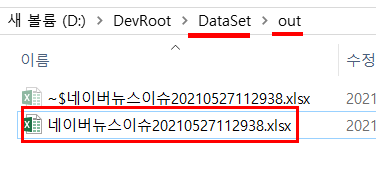

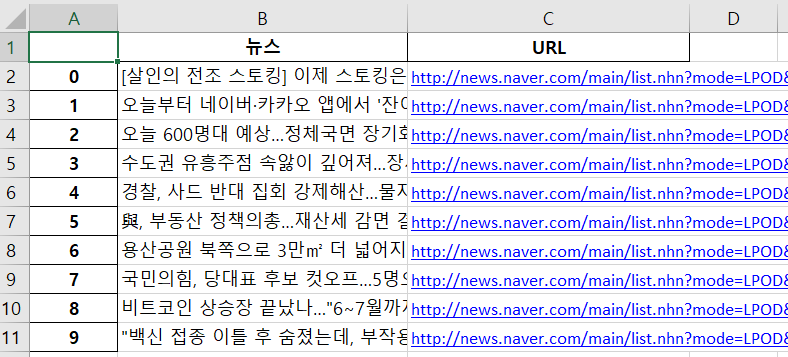

In [32]:
import os
import time

path = r'D:\DevRoot\DataSet\out'

if not os.path.exists(path):
    os.path.makedirs(path)

In [33]:
filepath = os.path.join(path, '네이버뉴스이슈{}.xlsx'.format(time.strftime('%Y%m%d%H%M%S')))
filepath

'D:\\DevRoot\\DataSet\\out\\네이버뉴스이슈20210527114709.xlsx'

In [34]:
df.to_excel(filepath)

In [35]:
df

,뉴스,URL
0,"신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속",http://news.naver.com/main/list.nhn?mode=LPOD&...
1,"한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%",http://news.naver.com/main/list.nhn?mode=LPOD&...
2,28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯,http://news.naver.com/main/list.nhn?mode=LPOD&...
3,"당정 'LH 해체안' 결론못내…與 ""사전협의도 없이"" 분통",http://news.naver.com/main/list.nhn?mode=LPOD&...
4,"특수본 ""세종시 특공 수사의뢰 없어…감사원 상황 볼 것""",http://news.naver.com/main/list.nhn?mode=LPOD&...
5,"공수처, '윤중천 보고서 허위작성' 이규원 재소환",http://news.naver.com/main/list.nhn?mode=LPOD&...
6,"지구대통령 된다면?…문대통령 ""해양쓰레기 줄이기 과제로""",http://news.naver.com/main/list.nhn?mode=LPOD&...
7,지난해 한국식품 수출 '역대 최고'…라면 29%↑ 김치 38%↑,http://news.naver.com/main/list.nhn?mode=LPOD&...
8,성주 사드기지 자재·물자 차량 반입…이달 들어 5번째,http://news.naver.com/main/list.nhn?mode=LPOD&...
9,"낮 동안 중부·경북·전북에 '우박'…""시설물 피해 대비해야""",http://news.naver.com/main/list.nhn?mode=LPOD&...


In [37]:
pd.read_excel(filepath, index_col = 0)

,뉴스,URL
0,"신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속",http://news.naver.com/main/list.nhn?mode=LPOD&...
1,"한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%",http://news.naver.com/main/list.nhn?mode=LPOD&...
2,28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯,http://news.naver.com/main/list.nhn?mode=LPOD&...
3,"당정 'LH 해체안' 결론못내…與 ""사전협의도 없이"" 분통",http://news.naver.com/main/list.nhn?mode=LPOD&...
4,"특수본 ""세종시 특공 수사의뢰 없어…감사원 상황 볼 것""",http://news.naver.com/main/list.nhn?mode=LPOD&...
5,"공수처, '윤중천 보고서 허위작성' 이규원 재소환",http://news.naver.com/main/list.nhn?mode=LPOD&...
6,"지구대통령 된다면?…문대통령 ""해양쓰레기 줄이기 과제로""",http://news.naver.com/main/list.nhn?mode=LPOD&...
7,지난해 한국식품 수출 '역대 최고'…라면 29%↑ 김치 38%↑,http://news.naver.com/main/list.nhn?mode=LPOD&...
8,성주 사드기지 자재·물자 차량 반입…이달 들어 5번째,http://news.naver.com/main/list.nhn?mode=LPOD&...
9,"낮 동안 중부·경북·전북에 '우박'…""시설물 피해 대비해야""",http://news.naver.com/main/list.nhn?mode=LPOD&...


# DB 에 저장

#### DDL

In [39]:
import pymysql
import pymysql.cursors

conn = pymysql.connect(
    host='localhost',
    port=3306,   # 디폴트 3306
    user='myuser',
    password='1234',
    database='mydb'
)

try:
    with conn.cursor() as cursor:
        sql = '''
           CREATE TABLE NAVER_NEWS_ISSUE (
               id INT(11) PRIMARY KEY AUTO_INCREMENT,
               news TEXT NOT NULL,
               url VARCHAR(300) NOT NULL,
               crawlDate DATETIME
           )
        '''
        cursor.execute(sql)
    
    print('테이블 생성')
except pymysql.OperationalError as e:
    print(e.args)
    print("MySQL 에러코드: ", e.args[0])  # MySQL 에러코드
    print("MySQL 에러메세지: ", e.args[1]) # MySLQ 에러 메세지
finally:
    conn.close()


테이블 생성


In [41]:
import pymysql
import pymysql.cursors
import time

conn = pymysql.connect(
    host='localhost',
    port=3306,   # 디폴트 3306
    user='myuser',
    password='1234',
    database='mydb'
)

# prepared statement 방식
try:
    crawlDate = time.strftime('%Y-%m-%d %H:%M:%S')
    
    with conn.cursor() as cursor:
        sql = 'INSERT INTO NAVER_NEWS_ISSUE(news, url, crawlDate) VALUES (%s, %s, %s)'
        
        for news_issue in result:
            cursor.execute(sql, (news_issue['뉴스'], news_issue['URL'], crawlDate))
        
    conn.commit()
    
#     print(cursor.lastrowid, cursor.rowcount, cursor.rownumber)
    # cursor.lastrowid  <-- last inser id
    # cursor.rowcount <-- affected row count  (DML 은 정수값 리턴)
    # cursor.rownumber
    
    
# pymysql 을 다룰 때 자주 등장하는 Error 들
except (pymysql.OperationalError, pymysql.ProgrammingError,
       pymysql.InternalError, pymysql.IntegrityError) as e:
    print(e.args)
    print("MySQL 에러코드: ", e.args[0])  # MySQL 에러코드
    print("MySQL 에러메세지: ", e.args[1]) # MySLQ 에러 메세지
finally:
    conn.close()


In [40]:
result

[{'뉴스': '신규확진 629명, 하루만에 다시 600명대로 내려와…확산세 지속',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419271'},
 {'뉴스': '한은, 금리동결…성장률 전망 3.0%→4.0%, 물가 1.3%→1.8%',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419683'},
 {'뉴스': "28일부터 로또 아파트 '줍줍족' 크게 줄어들 듯",
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419643'},
 {'뉴스': '당정 \'LH 해체안\' 결론못내…與 "사전협의도 없이" 분통',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419581'},
 {'뉴스': '특수본 "세종시 특공 수사의뢰 없어…감사원 상황 볼 것"',
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012419627'},
 {'뉴스': "공수처, '윤중천 보고서 허위작성' 이규원 재소환",
  'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&ai